<a href="https://colab.research.google.com/github/lanzaoui/TFG-Marrakech-la-futura-ciudad-roja-inteligente/blob/main/zona_gueliz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geoai-py
!pip install leafmap

In [2]:
import geoai

In [3]:
!pip install huggingface_hub
from huggingface_hub import HfApi, HfFolder, upload_file

In [4]:
from google.colab import userdata
from huggingface_hub import HfFolder, hf_hub_download

token = userdata.get("HF_TOKEN")
HfFolder.save_token(token)

In [5]:
zip_path = hf_hub_download(
    repo_id="lanzaoui/buildings",
    filename="gueliz.zip",
    repo_type="dataset"
)

print("Descargado en:", zip_path)

Descargado en: /root/.cache/huggingface/hub/datasets--lanzaoui--buildings/snapshots/a736611ff230ea0065af4f6f1820693c23f81c05/gueliz.zip


In [6]:
import zipfile, os

extract_dir = "/content/gueliz"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_dir)

!ls -R /content/gueliz

/content/gueliz:
gueliz

/content/gueliz/gueliz:
gueliz_este.cpg		gueliz_norte_oeste.qmd	gueliz_sud_oeste.cpg
gueliz_este.dbf		gueliz_norte_oeste.shp	gueliz_sud_oeste.dbf
gueliz_este.prj		gueliz_norte_oeste.shx	gueliz_sud_oeste.prj
gueliz_este.qmd		gueliz_oeste.cpg	gueliz_sud_oeste.qmd
gueliz_este.shp		gueliz_oeste.dbf	gueliz_sud_oeste.shp
gueliz_este.shx		gueliz_oeste.prj	gueliz_sud_oeste.shx
gueliz_norte_este.cpg	gueliz_oeste.qmd	zona_gueliz_este.tif
gueliz_norte_este.dbf	gueliz_oeste.shp	zonagueliz_norteeste.tif
gueliz_norte_este.prj	gueliz_oeste.shx	zonagueliz_norteoeste.tif
gueliz_norte_este.qmd	gueliz_sud_este.cpg	zonagueliz_oeste.tif
gueliz_norte_este.shp	gueliz_sud_este.dbf	zona_gueliz.qgz
gueliz_norte_este.shx	gueliz_sud_este.prj	zonagueliz_sudeste.tif
gueliz_norte_oeste.cpg	gueliz_sud_este.qmd	zonagueliz_sudoeste.tif
gueliz_norte_oeste.dbf	gueliz_sud_este.shp
gueliz_norte_oeste.prj	gueliz_sud_este.shx


In [7]:
import geopandas as gpd
shp_path = "/content/gueliz/gueliz/gueliz_este.shp"
gdf = gpd.read_file(shp_path)

print("Edificios cargados:", len(gdf))
gdf.head()

Edificios cargados: 152


,osm_id,code,fclass,name,type,geometry
0,288102794,1500,building,Carré d'Eden,None,"POLYGON ((-8.01134 31.63448, -8.01136 31.63446..."
1,288218448,1500,building,None,None,"POLYGON ((-8.01384 31.63598, -8.01383 31.63598..."
2,322475171,1500,building,Hotel Oudaya,None,"POLYGON ((-8.01657 31.63328, -8.01641 31.63331..."
3,322475175,1500,building,None,None,"POLYGON ((-8.0155 31.63403, -8.01544 31.63404,..."
4,322475177,1500,building,None,None,"POLYGON ((-8.0161 31.63263, -8.0161 31.63274, ..."


In [8]:
gdf = geoai.add_geometric_properties(gdf)
gdf.head()

,osm_id,code,fclass,name,type,geometry,area_m2,length_m,perimeter_m,area_bbox_m2,area_convex_m2,area_filled_m2,major_length_m,minor_length_m,eccentricity,orientation,elongation,extent,solidity,complexity
0,288102794,1500,building,Carré d'Eden,None,"POLYGON ((593755.337 3500345.802, 593753.016 3...",6119.791657,484.552059,484.552059,13399.842586,6868.688342,6119.791657,160.415109,158.174072,0.166569,0.000000,1.014168,0.456706,0.890969,1.747299
1,288218448,1500,building,None,None,"POLYGON ((593516.552 3500510.256, 593516.81 35...",213.669501,66.144576,66.144576,352.195703,217.280697,213.669501,24.873530,14.076034,0.824471,0.706233,1.767084,0.606678,0.983380,1.276492
2,322475171,1500,building,Hotel Oudaya,None,"POLYGON ((593260.39 3500208.713, 593275.098 35...",2338.736887,244.322184,244.322184,4516.170603,3011.346047,2338.736887,78.564055,68.276114,0.494724,0.000000,1.150681,0.517858,0.776642,1.425172
3,322475175,1500,building,None,None,"POLYGON ((593360.362 3500292.088, 593366.245 3...",73.659196,36.205399,36.205399,126.264574,73.659196,73.659196,13.258881,9.541170,0.694383,90.000000,1.389649,0.583372,1.000000,1.190022
4,322475177,1500,building,None,None,"POLYGON ((593304.919 3500137.104, 593304.811 3...",162.577227,51.086649,51.086649,165.525333,162.577227,162.577227,13.505244,12.038013,0.453299,0.516099,1.121883,0.982189,1.000000,1.130245


In [9]:
raster_url = "https://huggingface.co/datasets/lanzaoui/buildings/resolve/main/zona_gueliz_este.tif"

In [10]:
geoai.view_vector_interactive(
    gdf,
    tiles=raster_url,
    style_kwds={
        "color": "red",
        "fillOpacity": 0,
        "weight": 2
    }
)

In [11]:
print("Número total de edificios:", len(gdf))

X = 50

#Filtrar edificios
gdf_filtrado = gdf[gdf["area_m2"] > X]

#Contar los edificios filtrados
num_filtrados = len(gdf_filtrado)
print(f"Número de edificios con área > {X} m²:", num_filtrados)

Número total de edificios: 152
Número de edificios con área > 50 m²: 148


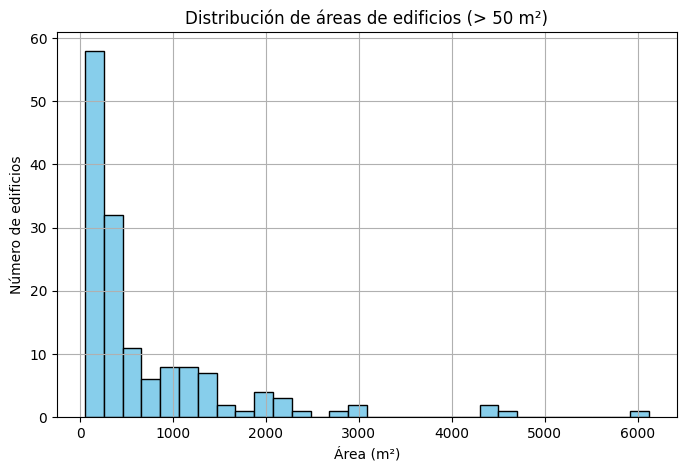

In [12]:
import matplotlib.pyplot as plt

#Histograma de áreas de edificios
plt.figure(figsize=(8,5))
gdf_filtrado["area_m2"].hist(bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Área (m²)")
plt.ylabel("Número de edificios")
plt.title(f"Distribución de áreas de edificios (> {X} m²)")
plt.show()

In [13]:
shp_path = "/content/gueliz/gueliz/gueliz_norte_este.shp"
gdf = gpd.read_file(shp_path)

print("Edificios cargados:", len(gdf))
gdf.head()

Edificios cargados: 182


,osm_id,code,fclass,name,type,geometry
0,209554885,1500,building,Afriquia أفريقيا,roof,"POLYGON ((-8.01314 31.63638, -8.01305 31.63641..."
1,276514518,1500,building,Auto Douche,None,"POLYGON ((-8.01729 31.63692, -8.01723 31.63693..."
2,288218448,1500,building,None,None,"POLYGON ((-8.01409 31.63599, -8.01408 31.63604..."
3,4596163,1500,building,None,None,"POLYGON ((-8.0156 31.63711, -8.01544 31.63715,..."
4,4596164,1500,building,None,None,"POLYGON ((-8.01653 31.63849, -8.01647 31.63851..."


In [14]:
gdf = geoai.add_geometric_properties(gdf)
gdf.head()

,osm_id,code,fclass,name,type,geometry,area_m2,length_m,perimeter_m,area_bbox_m2,area_convex_m2,area_filled_m2,major_length_m,minor_length_m,eccentricity,orientation,elongation,extent,solidity,complexity
0,209554885,1500,building,Afriquia أفريقيا,roof,"POLYGON ((593581.829 3500554.568, 593591.198 3...",169.589725,53.509003,53.509003,313.922222,169.695047,169.589725,19.294379,16.338172,0.531937,90.000000,1.180939,0.540228,0.999379,1.159103
1,276514518,1500,building,Auto Douche,None,"POLYGON ((593187.949 3500611.442, 593194.336 3...",217.334870,79.210191,79.210191,482.060617,217.334870,217.334870,33.656178,14.339080,0.904702,90.000000,2.347164,0.450846,1.000000,1.515694
2,288218448,1500,building,None,None,"POLYGON ((593492.589 3500510.512, 593493.037 3...",377.058031,94.163152,94.163152,676.828478,406.251850,377.058031,37.441479,15.420460,0.911249,27.261294,2.428039,0.557095,0.928139,1.367955
3,4596163,1500,building,None,None,"POLYGON ((593348.331 3500633.705, 593363.257 3...",2993.805216,340.789622,340.789622,5239.987770,3733.884999,3253.717350,87.465929,83.433947,0.300117,90.000000,1.048325,0.571338,0.801794,1.756991
4,4596164,1500,building,None,None,"POLYGON ((593258.559 3500785.972, 593264.295 3...",1729.666355,231.695885,231.695885,2846.503835,1995.649497,1856.893961,58.050890,45.002727,0.631680,103.143419,1.289942,0.607646,0.866719,1.571565


In [15]:
raster_url = "https://huggingface.co/datasets/lanzaoui/buildings/resolve/main/zonagueliz_norteeste.tif"

In [16]:
geoai.view_vector_interactive(
    gdf,
    tiles=raster_url,
    style_kwds={
        "color": "red",
        "fillOpacity": 0,
        "weight": 2
    }
)

HTTPSConnectionPool(host='giswqs-titiler-endpoint.hf.space', port=443): Read timed out. (read timeout=10)


In [17]:
print("Número total de edificios:", len(gdf))

X = 50

#Filtrar edificios
gdf_filtrado = gdf[gdf["area_m2"] > X]

#Contar los edificios filtrados
num_filtrados = len(gdf_filtrado)
print(f"Número de edificios con área > {X} m²:", num_filtrados)

Número total de edificios: 182
Número de edificios con área > 50 m²: 176


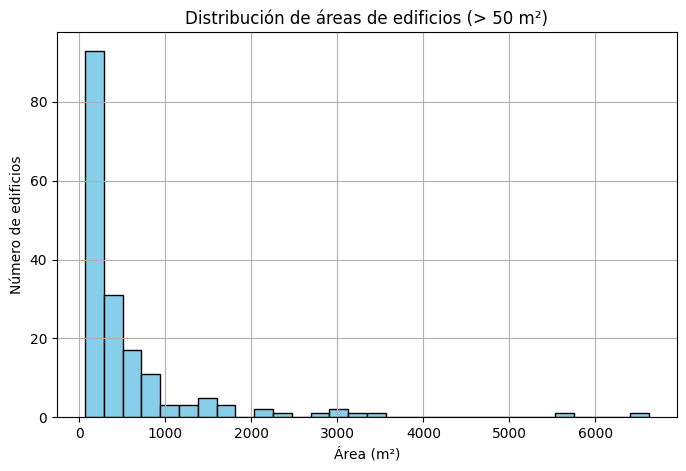

In [18]:
import matplotlib.pyplot as plt

#Histograma de áreas de edificios
plt.figure(figsize=(8,5))
gdf_filtrado["area_m2"].hist(bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Área (m²)")
plt.ylabel("Número de edificios")
plt.title(f"Distribución de áreas de edificios (> {X} m²)")
plt.show()

In [19]:
shp_path = "/content/gueliz/gueliz/gueliz_norte_oeste.shp"
gdf = gpd.read_file(shp_path)

print("Edificios cargados:", len(gdf))
gdf.head()

Edificios cargados: 84


,osm_id,code,fclass,name,type,geometry
0,328555750,1500,building,None,None,"POLYGON ((-8.01011 31.63928, -8.00952 31.63935..."
1,328555751,1500,building,None,None,"POLYGON ((-8.00979 31.63854, -8.00966 31.63856..."
2,328555754,1500,building,None,None,"POLYGON ((-8.00958 31.63808, -8.00938 31.63811..."
3,328555758,1500,building,None,None,"POLYGON ((-8.01058 31.63917, -8.01023 31.63924..."
4,351235705,1500,building,None,None,"POLYGON ((-8.0102 31.63725, -8.01011 31.63726,..."


In [20]:
gdf = geoai.add_geometric_properties(gdf)
gdf.head()

,osm_id,code,fclass,name,type,geometry,area_m2,length_m,perimeter_m,area_bbox_m2,area_convex_m2,area_filled_m2,major_length_m,minor_length_m,eccentricity,orientation,elongation,extent,solidity,complexity
0,328555750,1500,building,None,None,"POLYGON ((593866.389 3500878.86, 593922.58 350...",3288.779512,377.677077,377.677077,6285.200858,4249.349868,3288.779512,88.010461,79.988645,0.417115,90.0,1.100287,0.523258,0.773949,1.857797
1,328555751,1500,building,None,None,"POLYGON ((593897.874 3500797.458, 593910.169 3...",1510.036247,243.941065,243.941065,3089.414895,2090.767118,1510.036247,59.023752,55.560922,0.337483,0.0,1.062325,0.488777,0.722240,1.770868
2,328555754,1500,building,None,None,"POLYGON ((593918.298 3500746.606, 593936.669 3...",989.293886,163.241024,163.241024,1636.440043,1149.139703,989.293886,53.027665,32.363036,0.792167,0.0,1.638526,0.604540,0.860900,1.464070
3,328555758,1500,building,None,None,"POLYGON ((593822.514 3500866.888, 593855.626 3...",6557.004365,687.375218,687.375218,13075.065129,8857.023115,6557.004365,171.421507,99.446387,0.814525,90.0,1.723758,0.501489,0.740317,2.394618
4,351235705,1500,building,None,None,"POLYGON ((593860.441 3500654.096, 593868.842 3...",1058.275074,148.396151,148.396151,1607.896804,1203.677706,1058.275074,42.760417,41.638379,0.227578,90.0,1.026947,0.658174,0.879201,1.286822


In [21]:
raster_url = "https://huggingface.co/datasets/lanzaoui/buildings/resolve/main/zonagueliz_norteoeste.tif"

In [22]:
geoai.view_vector_interactive(
    gdf,
    tiles=raster_url,
    style_kwds={
        "color": "red",
        "fillOpacity": 0,
        "weight": 2
    }
)

HTTPSConnectionPool(host='giswqs-titiler-endpoint.hf.space', port=443): Read timed out. (read timeout=10)


In [23]:
print("Número total de edificios:", len(gdf))

X = 50

#Filtrar edificios
gdf_filtrado = gdf[gdf["area_m2"] > X]

#Contar los edificios filtrados
num_filtrados = len(gdf_filtrado)
print(f"Número de edificios con área > {X} m²:", num_filtrados)

Número total de edificios: 84
Número de edificios con área > 50 m²: 74


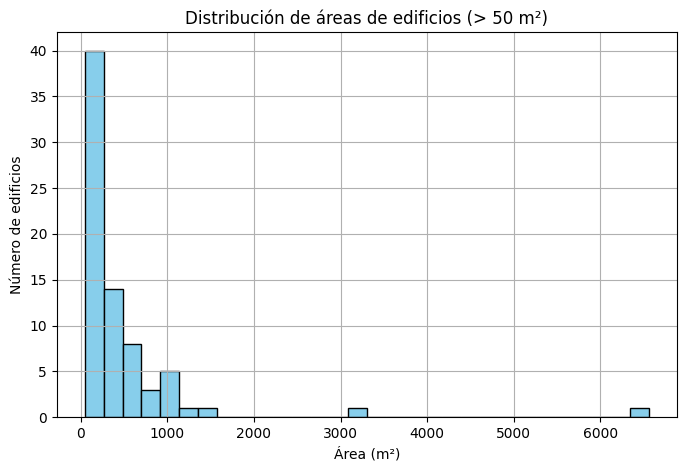

In [24]:
import matplotlib.pyplot as plt

#Histograma de áreas de edificios
plt.figure(figsize=(8,5))
gdf_filtrado["area_m2"].hist(bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Área (m²)")
plt.ylabel("Número de edificios")
plt.title(f"Distribución de áreas de edificios (> {X} m²)")
plt.show()

In [25]:
shp_path = "/content/gueliz/gueliz/gueliz_oeste.shp"
gdf = gpd.read_file(shp_path)

print("Edificios cargados:", len(gdf))
gdf.head()

Edificios cargados: 172


,osm_id,code,fclass,name,type,geometry
0,126153398,1500,building,None,None,"POLYGON ((-8.00421 31.63298, -8.00424 31.63307..."
1,131720573,1500,building,None,None,"POLYGON ((-8.00938 31.63267, -8.00937 31.6327,..."
2,131720575,1500,building,None,None,"POLYGON ((-8.00952 31.63287, -8.00952 31.63291..."
3,131720580,1500,building,None,None,"POLYGON ((-8.00968 31.63267, -8.00967 31.63299..."
4,186156519,1500,building,None,None,"POLYGON ((-8.00765 31.6342, -8.00687 31.63441,..."


In [26]:
gdf = geoai.add_geometric_properties(gdf)
gdf.head()

,osm_id,code,fclass,name,type,geometry,area_m2,length_m,perimeter_m,area_bbox_m2,area_convex_m2,area_filled_m2,major_length_m,minor_length_m,eccentricity,orientation,elongation,extent,solidity,complexity
0,126153398,1500,building,None,None,"POLYGON ((594432.869 3500186.045, 594429.948 3...",15.083478,23.850755,23.850755,31.121653,15.083478,15.083478,10.254555,2.941976,0.957962,106.550687,3.485602,0.484662,1.000000,1.732393
1,131720573,1500,building,None,None,"POLYGON ((593942.897 3500147.51, 593943.408 35...",310.103582,71.058933,71.058933,484.126344,310.157942,310.103582,22.355829,19.253253,0.508235,66.470077,1.161146,0.640543,0.999825,1.138309
2,131720575,1500,building,None,None,"POLYGON ((593928.837 3500169.026, 593928.865 3...",272.379624,69.032541,69.032541,545.140575,273.772676,272.379624,26.969809,23.633802,0.481755,0.000000,1.141154,0.499650,0.994912,1.179945
3,131720580,1500,building,None,None,"POLYGON ((593914.337 3500147.251, 593914.602 3...",501.952513,98.846351,98.846351,515.782157,501.974904,501.952513,35.448086,14.600936,0.911231,90.000000,2.427795,0.973187,0.999955,1.244585
4,186156519,1500,building,None,None,"POLYGON ((594105.242 3500317.873, 594179.119 3...",1847.802527,195.755087,195.755087,3765.524886,1857.875927,1847.802527,83.228594,52.313842,0.777764,0.000000,1.590948,0.490716,0.994578,1.284637


In [27]:
raster_url = "https://huggingface.co/datasets/lanzaoui/buildings/resolve/main/zonagueliz_oeste.tif"

In [28]:
geoai.view_vector_interactive(
    gdf,
    tiles=raster_url,
    style_kwds={
        "color": "red",
        "fillOpacity": 0,
        "weight": 2
    }
)

HTTPSConnectionPool(host='giswqs-titiler-endpoint.hf.space', port=443): Read timed out. (read timeout=10)


In [29]:
print("Número total de edificios:", len(gdf))

X = 50

#Filtrar edificios
gdf_filtrado = gdf[gdf["area_m2"] > X]

#Contar los edificios filtrados
num_filtrados = len(gdf_filtrado)
print(f"Número de edificios con área > {X} m²:", num_filtrados)

Número total de edificios: 172
Número de edificios con área > 50 m²: 162


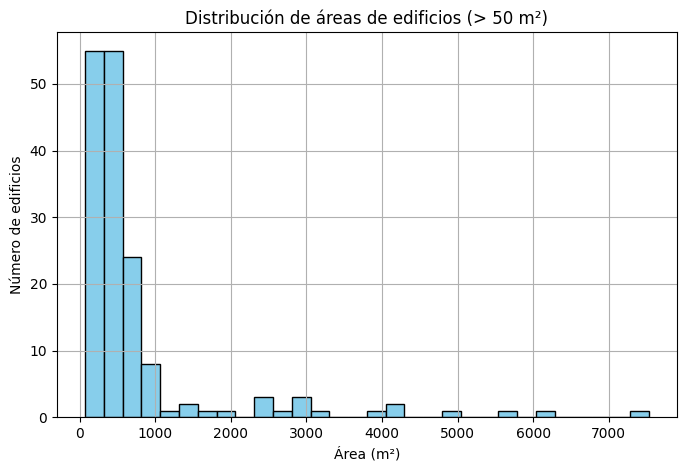

In [30]:
import matplotlib.pyplot as plt

#Histograma de áreas de edificios
plt.figure(figsize=(8,5))
gdf_filtrado["area_m2"].hist(bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Área (m²)")
plt.ylabel("Número de edificios")
plt.title(f"Distribución de áreas de edificios (> {X} m²)")
plt.show()

In [31]:
shp_path = "/content/gueliz/gueliz/gueliz_sud_oeste.shp"
gdf = gpd.read_file(shp_path)

print("Edificios cargados:", len(gdf))
gdf.head()

Edificios cargados: 279


,osm_id,code,fclass,name,type,geometry
0,126153398,1500,building,None,None,"POLYGON ((-8.00424 31.63307, -8.00421 31.63308..."
1,265879940,1500,building,None,None,"POLYGON ((-8.00709 31.63154, -8.00698 31.63146..."
2,304641514,1500,building,None,None,"POLYGON ((-8.00608 31.62996, -8.00599 31.63, -..."
3,4557749,1500,building,None,None,"POLYGON ((-8.00708 31.63299, -8.00704 31.63299..."
4,351235720,1500,building,None,None,"POLYGON ((-8.00701 31.63198, -8.00677 31.63219..."


In [32]:
gdf = geoai.add_geometric_properties(gdf)
gdf.head()

,osm_id,code,fclass,name,type,geometry,area_m2,length_m,perimeter_m,area_bbox_m2,area_convex_m2,area_filled_m2,major_length_m,minor_length_m,eccentricity,orientation,elongation,extent,solidity,complexity
0,126153398,1500,building,None,None,"POLYGON ((594429.948 3500195.875, 594432.927 3...",242.511782,62.561602,62.561602,377.741610,242.782922,242.511782,17.021982,14.334784,0.539269,16.537376,1.187460,0.642004,0.998883,1.133278
1,265879940,1500,building,None,None,"POLYGON ((594160.509 3500023.675, 594171.629 3...",133.551999,51.636661,51.636661,234.489084,133.551999,133.551999,21.294043,20.694987,0.235528,90.000000,1.028947,0.569545,1.000000,1.260457
2,304641514,1500,building,None,None,"POLYGON ((594258.185 3499849.435, 594266.558 3...",29.546094,28.378755,28.378755,60.043082,29.546094,29.546094,12.481928,4.734318,0.925276,0.521315,2.636479,0.492082,1.000000,1.472782
3,4557749,1500,building,None,None,"POLYGON ((594160.065 3500184.055, 594164.18 35...",917.208221,140.862336,140.862336,1544.037755,929.437066,917.208221,49.253727,30.785304,0.780597,106.529257,1.599910,0.594032,0.986843,1.312067
4,351235720,1500,building,None,None,"POLYGON ((594168.181 3500072.463, 594190.731 3...",794.251847,115.492379,115.492379,1485.686185,794.251847,794.251847,34.139150,31.434561,0.390088,150.990375,1.086039,0.534603,1.000000,1.156030


In [33]:
raster_url = "https://huggingface.co/datasets/lanzaoui/buildings/resolve/main/zonagueliz_sudoeste.tif"

In [34]:
geoai.view_vector_interactive(
    gdf,
    tiles=raster_url,
    style_kwds={
        "color": "red",
        "fillOpacity": 0,
        "weight": 2
    }
)

HTTPSConnectionPool(host='giswqs-titiler-endpoint.hf.space', port=443): Read timed out. (read timeout=10)


In [35]:
print("Número total de edificios:", len(gdf))

X = 50

#Filtrar edificios
gdf_filtrado = gdf[gdf["area_m2"] > X]

#Contar los edificios filtrados
num_filtrados = len(gdf_filtrado)
print(f"Número de edificios con área > {X} m²:", num_filtrados)

Número total de edificios: 279
Número de edificios con área > 50 m²: 146


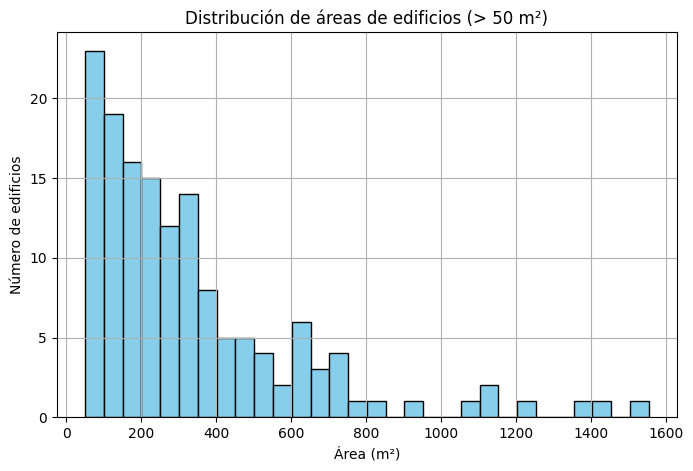

In [36]:
import matplotlib.pyplot as plt

#Histograma de áreas de edificios
plt.figure(figsize=(8,5))
gdf_filtrado["area_m2"].hist(bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Área (m²)")
plt.ylabel("Número de edificios")
plt.title(f"Distribución de áreas de edificios (> {X} m²)")
plt.show()

In [37]:
shp_path = "/content/gueliz/gueliz/gueliz_sud_este.shp"
gdf = gpd.read_file(shp_path)

print("Edificios cargados:", len(gdf))
gdf.head()

Edificios cargados: 123


,osm_id,code,fclass,name,type,geometry
0,9086391,1500,building,None,stadium,"POLYGON ((-8.00876 31.62773, -8.00906 31.6282,..."
1,169660994,1500,building,Eglise des Saints Martyrs,None,"POLYGON ((-8.00701 31.6297, -8.00699 31.62977,..."
2,304641514,1500,building,None,None,"POLYGON ((-8.00624 31.62947, -8.0062 31.62969,..."
3,594663418,1500,building,None,None,"POLYGON ((-8.00712 31.62773, -8.00713 31.62775..."
4,596605812,1500,building,None,None,"POLYGON ((-8.00615 31.63095, -8.00615 31.63095..."


In [38]:
gdf = geoai.add_geometric_properties(gdf)
gdf.head()

,osm_id,code,fclass,name,type,geometry,area_m2,length_m,perimeter_m,area_bbox_m2,area_convex_m2,area_filled_m2,major_length_m,minor_length_m,eccentricity,orientation,elongation,extent,solidity,complexity
0,9086391,1500,building,None,stadium,"POLYGON ((594006.715 3499599.849, 593977.475 3...",821.927420,177.657206,177.657206,3088.659660,821.927420,821.927420,79.023275,51.023248,0.763613,90.000000,1.548770,0.266111,1.000000,1.748079
1,169660994,1500,building,Eglise des Saints Martyrs,None,"POLYGON ((594169.923 3499820.3, 594171.931 349...",1768.310381,177.369412,177.369412,2295.882625,1900.259682,1768.310381,57.608071,37.416905,0.760355,174.443364,1.539627,0.770209,0.930562,1.189856
2,304641514,1500,building,None,None,"POLYGON ((594243.2 3499794.55, 594246.823 3499...",1817.851216,185.341662,185.341662,3031.679657,1948.198496,1817.851216,63.651489,41.845214,0.753532,75.437073,1.521118,0.599619,0.933093,1.226278
3,594663418,1500,building,None,None,"POLYGON ((594161.998 3499601.598, 594160.806 3...",20.984138,19.502618,19.502618,35.395413,20.984138,20.984138,7.522528,7.457733,0.130968,0.000000,1.008688,0.592849,1.000000,1.200998
4,596605812,1500,building,None,None,"POLYGON ((594251.008 3499959.035, 594250.793 3...",0.160856,2.037158,2.037158,0.323798,0.160856,0.160856,0.861141,0.373538,0.901023,0.646897,2.305366,0.496778,1.000000,1.432852


In [39]:
raster_url = "https://huggingface.co/datasets/lanzaoui/buildings/resolve/main/zonagueliz_sudeste.tif"

In [40]:
geoai.view_vector_interactive(
    gdf,
    tiles=raster_url,
    style_kwds={
        "color": "red",
        "fillOpacity": 0,
        "weight": 2
    }
)

HTTPSConnectionPool(host='giswqs-titiler-endpoint.hf.space', port=443): Read timed out. (read timeout=10)


In [41]:
print("Número total de edificios:", len(gdf))

X = 50

#Filtrar edificios
gdf_filtrado = gdf[gdf["area_m2"] > X]

#Contar los edificios filtrados
num_filtrados = len(gdf_filtrado)
print(f"Número de edificios con área > {X} m²:", num_filtrados)

Número total de edificios: 123
Número de edificios con área > 50 m²: 96


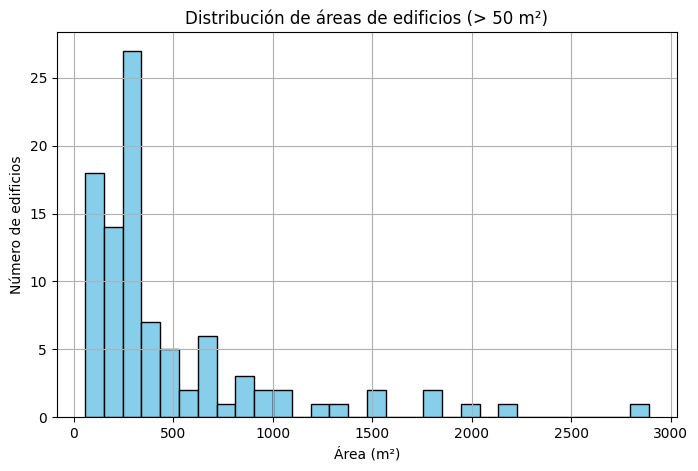

In [42]:
import matplotlib.pyplot as plt

#Histograma de áreas de edificios
plt.figure(figsize=(8,5))
gdf_filtrado["area_m2"].hist(bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Área (m²)")
plt.ylabel("Número de edificios")
plt.title(f"Distribución de áreas de edificios (> {X} m²)")
plt.show()

In [43]:
#Para gueliz_este.shp
gdf_este = gpd.read_file("/content/gueliz/gueliz/gueliz_este.shp")
gdf_este["zona"] = "este"

#Para gueliz_oeste.shp
gdf_oeste = gpd.read_file("/content/gueliz/gueliz/gueliz_oeste.shp")
gdf_oeste["zona"] = "oeste"

#Para gueliz_norte_este.shp
gdf_norte_este = gpd.read_file("/content/gueliz/gueliz/gueliz_norte_este.shp")
gdf_norte_este["zona"] = "norte_este"

#Para gueliz_norte_oeste.shp
gdf_norte_oeste = gpd.read_file("/content/gueliz/gueliz/gueliz_norte_oeste.shp")
gdf_norte_oeste["zona"] = "norte_oeste"

#Para gueliz_sud_este.shp
gdf_sud_este = gpd.read_file("/content/gueliz/gueliz/gueliz_sud_este.shp")
gdf_sud_este["zona"] = "sud_este"

#Para gueliz_sud_oeste.shp
gdf_sud_oeste = gpd.read_file("/content/gueliz/gueliz/gueliz_sud_oeste.shp")
gdf_sud_oeste["zona"] = "sud_oeste"

In [44]:
#Para la zona este
gdf_este = geoai.add_geometric_properties(gdf_este)

X = 50
gdf_filtrado_este = gdf_este[gdf_este["area_m2"] > X]
num_filtrados_este = len(gdf_filtrado_este)
print(f"Número de edificios >{X} m² en zona ESTE: {num_filtrados_este}")

#Para la zona oeste
gdf_oeste = geoai.add_geometric_properties(gdf_oeste)
gdf_filtrado_oeste = gdf_oeste[gdf_oeste["area_m2"] > X]
num_filtrados_oeste = len(gdf_filtrado_oeste)
print(f"Número de edificios >{X} m² en zona OESTE: {num_filtrados_oeste}")

#Para la zona norte_este
gdf_norte_este = geoai.add_geometric_properties(gdf_norte_este)
gdf_filtrado_norte_este = gdf_norte_este[gdf_norte_este["area_m2"] > X]
num_filtrados_norte_este = len(gdf_filtrado_norte_este)
print(f"Número de edificios >{X} m² en zona NORTE_ESTE: {num_filtrados_norte_este}")

#Para la zona norte_oeste
gdf_norte_oeste = geoai.add_geometric_properties(gdf_norte_oeste)
gdf_filtrado_norte_oeste = gdf_norte_oeste[gdf_norte_oeste["area_m2"] > X]
num_filtrados_norte_oeste = len(gdf_filtrado_norte_oeste)
print(f"Número de edificios >{X} m² en zona NORTE_OESTE: {num_filtrados_norte_oeste}")

#Para la zona sud_este
gdf_sud_este = geoai.add_geometric_properties(gdf_sud_este)
gdf_filtrado_sud_este = gdf_sud_este[gdf_sud_este["area_m2"] > X]
num_filtrados_sud_este = len(gdf_filtrado_sud_este)
print(f"Número de edificios >{X} m² en zona SUD_ESTE: {num_filtrados_sud_este}")

#Para la zona sud_oeste
gdf_sud_oeste = geoai.add_geometric_properties(gdf_sud_oeste)
gdf_filtrado_sud_oeste = gdf_sud_oeste[gdf_sud_oeste["area_m2"] > X]
num_filtrados_sud_oeste = len(gdf_filtrado_sud_oeste)
print(f"Número de edificios >{X} m² en zona SUD_OESTE: {num_filtrados_sud_oeste}")

Número de edificios >50 m² en zona ESTE: 148
Número de edificios >50 m² en zona OESTE: 162
Número de edificios >50 m² en zona NORTE_ESTE: 176
Número de edificios >50 m² en zona NORTE_OESTE: 74
Número de edificios >50 m² en zona SUD_ESTE: 96
Número de edificios >50 m² en zona SUD_OESTE: 146


In [45]:
import pandas as pd

zonas_stats = [
    {"zona": "este", "num_gt50": num_filtrados_este, "total_buildings": len(gdf_este), "area_total_m2": gdf_este["area_m2"].sum()},
    {"zona": "oeste", "num_gt50": num_filtrados_oeste, "total_buildings": len(gdf_oeste), "area_total_m2": gdf_oeste["area_m2"].sum()},
    {"zona": "norte_este", "num_gt50": num_filtrados_norte_este, "total_buildings": len(gdf_norte_este), "area_total_m2": gdf_norte_este["area_m2"].sum()},
    {"zona": "norte_oeste", "num_gt50": num_filtrados_norte_oeste, "total_buildings": len(gdf_norte_oeste), "area_total_m2": gdf_norte_oeste["area_m2"].sum()},
    {"zona": "sud_este", "num_gt50": num_filtrados_sud_este, "total_buildings": len(gdf_sud_este), "area_total_m2": gdf_sud_este["area_m2"].sum()},
    {"zona": "sud_oeste", "num_gt50": num_filtrados_sud_oeste, "total_buildings": len(gdf_sud_oeste), "area_total_m2": gdf_sud_oeste["area_m2"].sum()},
]

df_stats = pd.DataFrame(zonas_stats)
df_stats

,zona,num_gt50,total_buildings,area_total_m2
0,este,148,152,105823.796756
1,oeste,162,172,125626.559991
2,norte_este,176,182,101711.017870
3,norte_oeste,74,84,35542.330186
4,sud_este,96,123,46937.841850
5,sud_oeste,146,279,51911.821486


In [46]:
total_buildings = df_stats["total_buildings"].sum()
total_gt50 = df_stats["num_gt50"].sum()
total_area = df_stats["area_total_m2"].sum()

print("Resumen global Gueliz:")
print(f"Total edificios: {total_buildings}")
print(f"Total edificios >50 m²: {total_gt50}")
print(f"Área total de techos: {total_area:.0f} m²")

Resumen global Gueliz:
Total edificios: 992
Total edificios >50 m²: 802
Área total de techos: 467553 m²


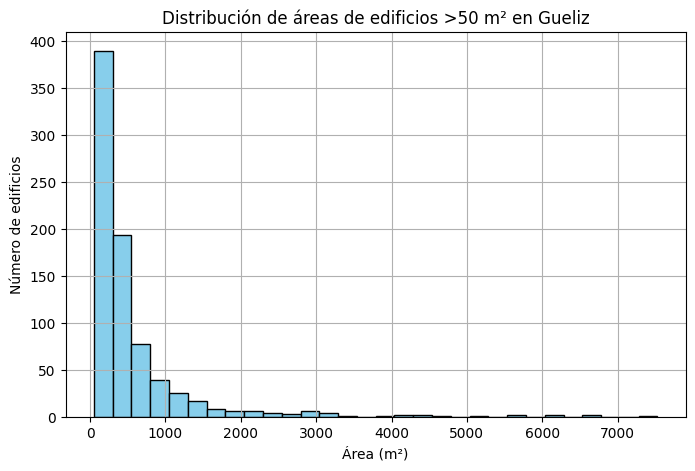

In [47]:
gdf_filtrados = pd.concat([gdf_filtrado_este, gdf_filtrado_oeste, gdf_filtrado_norte_este,
                           gdf_filtrado_norte_oeste, gdf_filtrado_sud_este, gdf_filtrado_sud_oeste])

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
gdf_filtrados["area_m2"].hist(bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Área (m²)")
plt.ylabel("Número de edificios")
plt.title("Distribución de áreas de edificios >50 m² en Gueliz")
plt.show()

In [48]:
import math, json, pandas as pd

GHI_daily = 5.52         # kWh/m2/day (Marrakech -> 2014 kWh/m2/year -> 2014/365)
efficiency = 0.20        # rendimiento módulos (20%)
performance_ratio = 0.78 # PR (0.75-0.85 approx)
roof_coverage = 0.60     # fracción del tejado utilizable
area_per_kwp = 6.0       # m2 por kWp instalado

total_area_m2 = None

try:
    total_area_m2 = float(gdf_total["area_m2"].sum())
    source = "gdf_total"
except Exception:
    pass

if total_area_m2 is None:
    try:
        total_area_m2 = float(df_stats["area_total_m2"].sum())
        source = "df_stats"
    except Exception:
        pass

if total_area_m2 is None:
    print("No se encuentra gdf_total ni df_stats. Introduce total_area_m2 manualmente (m2):")
    total_area_m2 = float(input("Área total techos (m2): "))
    source = "manual_input"

A_total = total_area_m2
A_usable = A_total * roof_coverage

E_daily_kwh = A_usable * GHI_daily * efficiency * performance_ratio
E_annual_kwh = E_daily_kwh * 365

kwp_installed = A_usable / area_per_kwp
spec_yield = (GHI_daily * 365 * efficiency * performance_ratio)  # kWh/kWp/year approx

res = {
    "source_of_area": source,
    "A_total_m2": A_total,
    "A_usable_m2": A_usable,
    "GHI_daily_kWh_m2": GHI_daily,
    "efficiency": efficiency,
    "performance_ratio": performance_ratio,
    "roof_coverage": roof_coverage,
    "area_per_kwp_m2": area_per_kwp,
    "kwp_installed_est": kwp_installed,
    "E_daily_kwh": E_daily_kwh,
    "E_annual_kwh": E_annual_kwh,
    "specific_yield_kwh_per_kwp_year": spec_yield
}

print("\n==== Estimación solar (resumen) ====")
print(f"Fuente de área: {res['source_of_area']}")
print(f"Área total techos: {res['A_total_m2']:,} m²")
print(f"Área util para paneles (A_usable): {res['A_usable_m2']:,} m² (roof_coverage={roof_coverage})")
print(f"Potencia instalable estimada: {res['kwp_installed_est']:,} kWp (≈ {res['kwp_installed_est']/1000:.2f} MWp)")
print(f"Producción anual estimada: {res['E_annual_kwh']:,} kWh/año")

with open("/content/gueliz_solar_estimate.json", "w") as f:
    json.dump(res, f, indent=2)

pd.DataFrame([res]).to_csv("/content/gueliz_solar_estimate.csv", index=False)

print("\nResultados guardados en /content/gueliz_solar_estimate.json y .csv")


==== Estimación solar (resumen) ====
Fuente de área: df_stats
Área total techos: 467,553.36813847936 m²
Área util para paneles (A_usable): 280,532.0208830876 m² (roof_coverage=0.6)
Potencia instalable estimada: 46,755.336813847935 kWp (≈ 46.76 MWp)
Producción anual estimada: 88,173,682.8453382 kWh/año

Resultados guardados en /content/gueliz_solar_estimate.json y .csv
